In [3]:
import tensorflow as tf 

Loading - "MNIST Data Set"

Containing Training Samples=60,000 , testing Samples =10,000

In [4]:
 mnist= tf.keras.datasets.mnist #it is handwritten character based on 28*28 sized pixel images from 0 to 9

In [5]:
(x_train , y_train),(x_test,y_test)=mnist.load_data()

In [6]:
x_train.shape #60,000 images and 28*28 pixel images

(60000, 28, 28)

In [7]:
print(y_train[4])

9


In [8]:
import matplotlib.pyplot as plt 

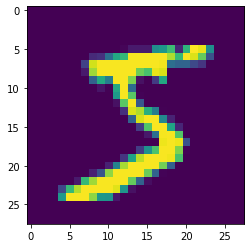

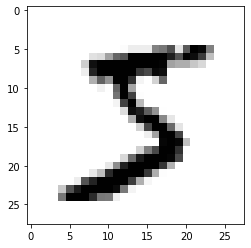

In [9]:
plt.imshow(x_train[0])
plt.show()  #to print in the form of graph
#we dont know it is colorful or binary images so lets convert it into binary images
plt.imshow(x_train[0],cmap=plt.cm.binary) #converted into binary images

Check the values of Each Pixel 

Before Normalistation

In [10]:
print(x_train[0]) #it will show all the numbers ranging from 0 to 255
# 0 for black and 255 for white 
#numbers between 0 to 255 are gray color

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

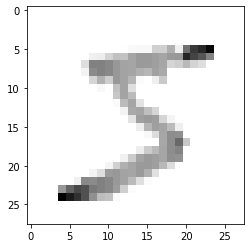

In [11]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
# it is as equal to x_train/255 as every value of the pixels will get divide by 255 to bring the range from 0 to 1

After Normalization

Pixels range from 0 to 255 changed to 0 to 1

In [12]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print(y_train[0]) #x_train has data and y_train has labels

5


Resizing image to make it suitable for apply Convolution operation

In [14]:
import numpy as np
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1) # 60,000 , 28 , 28 , 1 # increasing one dimension for kernel operation
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)

print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


Creating a Deep Neural Network

Training on 60,000 samples of MNIST handwritten dataset

In [15]:
from tensorflow.keras.models import Sequential
#Sequential connects the Deep Learning layers
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
#Dense , Dropout,Activation,Flatten,Conv2D,MaxPooling2D are the deep learning lAYERS

In [86]:
#creating a neural network now
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:])) #first convolution layer
model.add(Activation("relu")) #activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) #single maximum value of 2x2 

model.add(Conv2D(64,(3,3)))#2nd Convolution layer
model.add(Activation("relu")) #activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) #single maximum value of 2x2 

model.add(Conv2D(64,(3,3)))#3rd Convolution layer
model.add(Activation("relu")) #activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) #single maximum value of 2x2 

#Fully Connected Layer 1
model.add(Flatten())  #converts any matrix to mx1 matrix (aka vector)
model.add(Dense(64))
model.add(Activation("relu"))

##Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

##Last Fully Connected Layer, output must be equal to number of classes, 10
model.add(Dense(10)) ##this last dense layer must be equal to 10 as the numbers are ( 0 to 9 so total 10 numbers )
model.add(Activation("softmax"))#activation function is changed to softmax 


In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [88]:
print("Total training Samples:-",len(x_trainr))

Total training Samples:- 60000


In [89]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [90]:
model.fit(x_train,y_train,epochs=3,validation_split=0.3)

Epoch 1/3
1313/1313 [==============================] - 51s 37ms/step - loss: 0.3518 - accuracy: 0.8892 - val_loss: 0.1146 - val_accuracy: 0.9650
Epoch 2/3
1313/1313 [==============================] - 51s 39ms/step - loss: 0.1024 - accuracy: 0.9687 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 3/3
1313/1313 [==============================] - 51s 38ms/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.0866 - val_accuracy: 0.9747


In [112]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 Samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0879 - accuracy: 0.9769
Test Loss on 10,000 Samples 0.0878753662109375
Validation Accuracy on 10,000 test samples 0.9768999814987183


In [93]:
predictions=model.predict([x_testr])

313/313 [==============================] - 3s 11ms/step


In [94]:
print(np.argmax(predictions[5]))

1


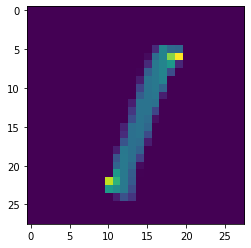

In [95]:
plt.imshow(x_test[5])

In [96]:
print(np.argmax(predictions[100]))

6


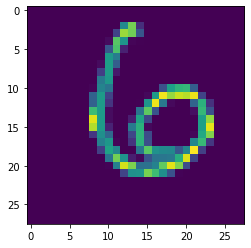

In [97]:
plt.imshow(x_test[100])

In [98]:
import cv2
img=cv2.imread('three.png')

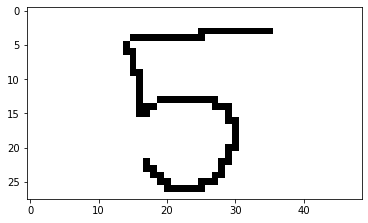

In [99]:
plt.imshow(img)

In [100]:
img.shape

(28, 49, 3)

In [101]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [102]:
gray.shape

(28, 49)

In [103]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [104]:
resized.shape



(28, 28)

In [105]:
newimg=tf.keras.utils.normalize(resized,axis=1) # will convert it into 0 to 1


In [106]:
newimg.shape

(28, 28)

In [107]:
newimg=np.array(newimg).reshape(-1,img_size,img_size,1)

In [108]:
newimg.shape

(1, 28, 28, 1)

In [109]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 244ms/step


In [111]:
print(np.argmax(predictions))

0
